<a href="https://colab.research.google.com/github/Chay-spec/AI-ML/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSGINMENT1: PREDICT THE CAR** **VALUES**



In [ ]:
import numpy as np
import pandas as pd
import sklearn as metrics
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content


In [ ]:
data=pd.read_csv("car data.csv")

In [ ]:
data[:10] #to check the head of the frame
data.head(10)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

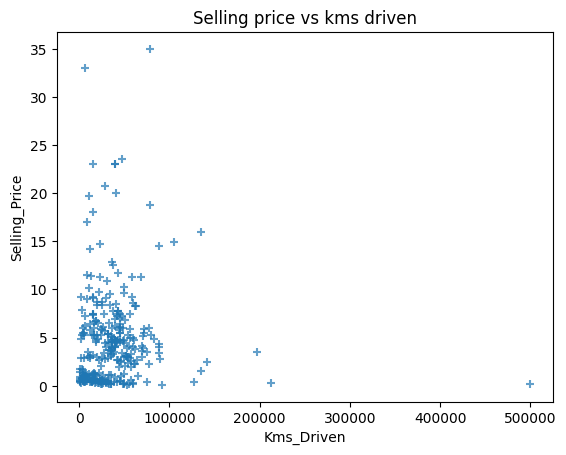

In [ ]:
# Create a Scatter plot to visulaize how Selling_Price varies with Kms_Driven
plt.scatter(data['Kms_Driven'],data['Selling_Price'], alpha=0.7, marker='+')
plt.title("Selling price vs kms driven")
plt.xlabel("Kms_Driven")
plt.ylabel("Selling_Price")
plt.show()


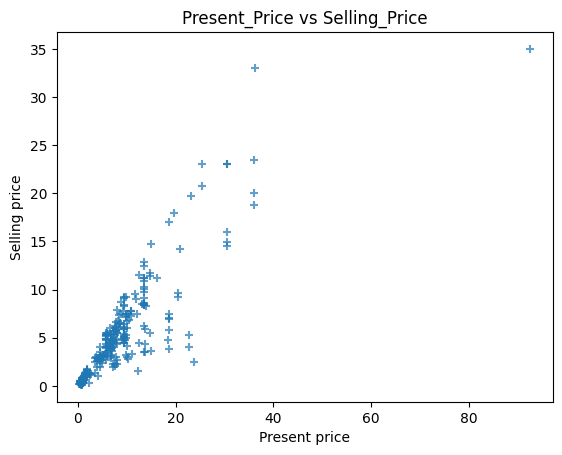

In [ ]:
# Create a Scatter plot to visulaize how Selling_Price varies with Present_Price
plt.scatter(data['Present_Price'],data['Selling_Price'],alpha=0.7,marker='+')
plt.title("Present_Price vs Selling_Price")
plt.xlabel('Present price')
plt.ylabel('Selling price')
plt.show()

In [ ]:
print(data.Fuel_Type.value_counts(),"\n")
print(data.Seller_Type.value_counts(),"\n")
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64 

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
fuel_encoder=LabelEncoder()
data["Fuel_Type"]=fuel_encoder.fit_transform(data.Fuel_Type)

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,3.000000


In [ ]:
sel_en=LabelEncoder()
data["Seller_Type"]=sel_en.fit_transform(data.Seller_Type)

In [ ]:
trans_en=LabelEncoder()
data["Transmission"]=trans_en.fit_transform(data.Transmission)

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
y=data.Selling_Price
x=data.drop(["Car_Name","Selling_Price"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (240, 7)
x_test (61, 7)
y_train (240,)
y_test (61,)


In [ ]:
print(x.dtypes)
print(y.dtypes)

Year               int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object
float64


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train,)

LinearRegression()

In [ ]:
#Model prediction on test data
predictions = lr.predict (x_test)
test_error=mean_absolute_error(y_test,predictions)
print("Mean absolute error:", test_error)

#Model prediction on train data
predictions = lr.predict(x_train)
train_error= mean_absolute_error(y_train,predictions)
print("Mean absolute error:", train_error)

Mean absolute error: 1.1530045916165366
Mean absolute error: 1.2170411125163967


In [ ]:
data.iloc[4]

,4
Car_Name,swift
Year,2014
Selling_Price,4.6
Present_Price,6.87
Kms_Driven,42450
Fuel_Type,1
Seller_Type,0
Transmission,1
Owner,0


In [ ]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [ ]:
Year= 2014
Present_Price= 5.59
Kms_Driven= 27000
Fuel_Type=2
Seller_Type=0
Transmission=1
Owner=0

In [ ]:
my_car=np.array([Year,Present_Price,	Kms_Driven,	Fuel_Type,	Seller_Type,	Transmission,	Owner])

In [ ]:
print("predicted_value:", lr.predict(my_car.reshape(1,-1)))

predicted_value: [3.84665454]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
